In [178]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [179]:
# Importing the required libraries for visualization 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# Visualization Prefrences.
%matplotlib inline

In [180]:
# to Pass the warning output in the results 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [181]:
# read by default 1st sheet of an excel file
df = pd.read_excel('Telco_customer_churn_services1.xlsx')
df

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,1,Q3,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,1,Q3,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [182]:
df.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [183]:
df['Customer ID'].duplicated().sum()

0

In [184]:
#### df['fixed_acidity'] = df['fixed_acidity'].apply(lambda x: [float(i) for i in str(x).split('|')])

In [185]:
pd.set_option('display.max_columns', None)
df.head(15)

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
5,4412-YLTKF,1,Q3,No,0,27,Offer C,Yes,3.33,Yes,Yes,Fiber Optic,18,No,No,Yes,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,78.05,2135.50,0.00,10,89.91,2235.41
6,0390-DCFDQ,1,Q3,Yes,1,1,Offer E,Yes,15.28,No,Yes,Fiber Optic,30,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,70.45,70.45,0.00,0,15.28,85.73
7,3445-HXXGF,1,Q3,Yes,6,58,Offer B,No,0.00,No,Yes,DSL,24,No,Yes,Yes,No,No,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,45.30,2651.20,40.95,0,0.00,2610.25
8,2656-FMOKZ,1,Q3,No,0,15,Offer D,Yes,44.07,Yes,Yes,Fiber Optic,19,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,74.45,1145.70,0.00,0,661.05,1806.75
9,2070-FNEXE,1,Q3,No,0,7,Offer E,Yes,26.95,No,Yes,Fiber Optic,18,Yes,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,76.45,503.60,11.05,0,188.65,681.20


In [186]:
df = df.drop(['Quarter', 'Paperless Billing','Payment Method','Referred a Friend'],axis = 1)

In [187]:
df.columns

Index(['Customer ID', 'Count', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [189]:
from sklearn import preprocessing
features  = ['Customer ID','Offer', 'Phone Service','Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract']
le = preprocessing.LabelEncoder()

for i in features:
    df[i] = le.fit_transform(df[i])

In [190]:
# Features normalizations 

In [191]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Kmeans

#### elbow method

In [192]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

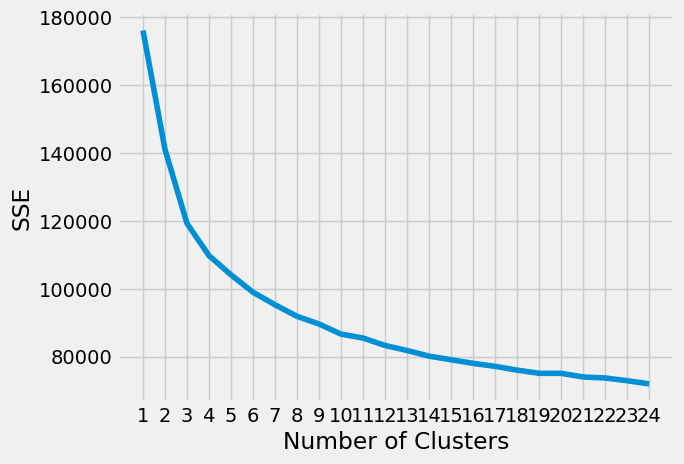

In [193]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 25), sse)
plt.xticks(range(1, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [194]:
kl = KneeLocator(range(1,25), sse, curve="convex", direction="decreasing")

kl.elbow

6

#### Kmeans silhouette method

In [195]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

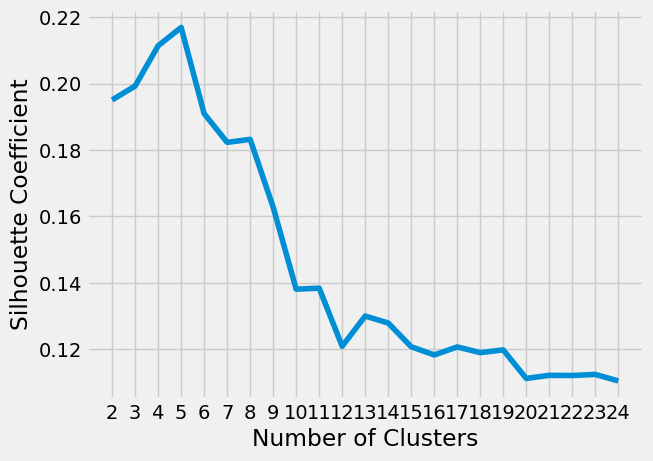

In [196]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 25), silhouette_coefficients)
plt.xticks(range(2, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [197]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(df)
kmeans.labels_
kmeans.cluster_centers_

array([[1.68598816e+03, 1.00000000e+00, 2.54036598e+00, 4.61356297e+01,
        9.50484392e-01, 8.96663079e-01, 2.37885791e+01, 5.18837460e-01,
        8.31001076e-01, 1.63724435e+00, 1.77072121e+01, 3.42303552e-01,
        4.03659849e-01, 4.23035522e-01, 3.47685684e-01, 4.49946179e-01,
        4.79009688e-01, 4.25188375e-01, 7.22282024e-01, 9.56942949e-01,
        6.90843380e+01, 2.90382217e+03, 2.34819160e+00, 9.03121636e+00,
        1.03719875e+03, 3.94770395e+03],
       [5.27865918e+03, 1.00000000e+00, 3.10568032e+00, 6.21558785e+01,
        7.35799207e-01, 1.00000000e+00, 2.71006209e+01, 7.71466314e-01,
        1.00000000e+00, 1.59048877e+00, 2.16922061e+01, 5.71994716e-01,
        7.06737120e-01, 7.06737120e-01, 5.98414795e-01, 7.30515192e-01,
        7.35799207e-01, 6.51254954e-01, 8.57331572e-01, 1.35138705e+00,
        9.36538970e+01, 5.81246539e+03, 2.33649934e+00, 1.03698811e+01,
        1.65670124e+03, 7.47720001e+03],
       [5.21550449e+03, 1.00000000e+00, 2.19740778e+00

In [198]:
df['clusters'] = kmeans.labels_

In [199]:
df['clusters'].unique()

array([5, 3, 0, 2, 4, 1])

# KNN

In [200]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [201]:
# Calculate the similarity matrix using KNN
k = 5  # Number of neighbors for KNN
knn = NearestNeighbors(n_neighbors=k)
knn.fit(df[features])
distances, indices = knn.kneighbors(df[features])

In [202]:
# Find the optimal K using silhouette score
k_values = range(2, 10)  # Range of K values to evaluate
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(distances)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(distances, cluster_labels))

# Find the best K value with the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]

# Print the best K value and its corresponding silhouette score
print("Best K value:", best_k)
print("Silhouette score:", max(silhouette_scores))

Best K value: 2
Silhouette score: 0.4914359923145307


# The similarity matrix

In [203]:
# Apply K-means clustering on the similarity matrix
K_clusters = 2  # Number of clusters for K-means
kmeans = KMeans(n_clusters=K_clusters)
kmeans.fit(distances)

# Get the cluster labels for each client
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Display the dataframe with cluster assignments
print(df)

      Customer ID  Count  Number of Referrals  Tenure in Months  Offer  \
0            6207      1                    0                 1      0   
1            5305      1                    1                 8      5   
2            1129      1                    0                18      4   
3            3208      1                    1                25      3   
4            3419      1                    1                37      3   
...           ...    ...                  ...               ...    ...   
7038         1758      1                    0                72      0   
7039         4853      1                    1                24      3   
7040         1525      1                    4                72      0   
7041         3367      1                    1                11      0   
7042         2226      1                    0                66      0   

      Phone Service  Avg Monthly Long Distance Charges  Multiple Lines  \
0                 0                  

In [204]:
df['Cluster']

0       1
1       1
2       0
3       0
4       1
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Cluster, Length: 7043, dtype: int32

In [205]:
###############
###########

In [206]:
df

,Customer ID,Count,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clusters,Cluster
0,6207,1,0,1,0,0,0.00,0,1,1,7,0,0,1,0,0,1,0,0,0,39.65,39.65,0.00,20,0.00,59.65,5,1
1,5305,1,1,8,5,1,48.85,1,1,2,16,0,1,0,0,0,0,0,1,0,80.65,633.30,0.00,0,390.80,1024.10,5,1
2,1129,1,0,18,4,1,11.33,1,1,2,37,0,0,0,0,1,1,1,1,0,95.45,1752.55,45.61,0,203.94,1910.88,3,0
3,3208,1,1,25,3,1,19.76,0,1,2,11,0,1,1,0,1,1,0,1,0,98.50,2514.50,13.43,0,494.00,2995.07,0,0
4,3419,1,1,37,3,1,6.33,1,1,2,13,0,0,0,0,0,0,0,1,0,76.50,2868.15,0.00,0,234.21,3102.36,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1758,1,0,72,0,1,22.77,0,0,3,0,0,0,0,0,0,0,0,0,2,21.15,1419.40,19.31,0,1639.44,3039.53,0,1
7039,4853,1,1,24,3,1,36.05,1,1,0,23,1,0,1,1,1,1,1,1,1,84.80,1990.50,48.23,0,865.20,2807.47,2,1
7040,1525,1,4,72,0,1,29.66,1,1,2,42,0,1,1,0,1,1,1,1,1,103.20,7362.90,45.38,0,2135.52,9453.04,4,1
7041,3367,1,1,11,0,0,0.00,0,1,1,16,1,0,0,0,0,0,0,1,0,29.60,346.45,27.24,0,0.00,319.21,3,0


#1 -  Normalize the data

In [207]:
#1 -  Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

In [208]:
# Define the distance metrics to use
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'l1', 'l2', 'chebyshev', 'minkowski']

# Calculate the similarity matrix using KNN
k = 2  # Number of neighbors for KNN

# Iterate over each distance metric
for metric in distance_metrics:
    # Calculate the similarity matrix using the current distance metric
    if metric == 'cosine':
        # For cosine similarity, use pairwise_distances function
        distances = 1 - pairwise_distances(normalized_data, metric=metric)
    else:
        # For other metrics, use NearestNeighbors
        knn = NearestNeighbors(n_neighbors=k, metric=metric)
        knn.fit(normalized_data)
        distances, indices = knn.kneighbors(normalized_data)
        
    similarity_matrices[metric] = distances
    # Find the optimal K using silhouette score
    k_values = range(2, 10)  # Range of K values to evaluate
    silhouette_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(distances)
        cluster_labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(distances, cluster_labels))

    # Find the best K value with the highest silhouette score
    best_k = k_values[np.argmax(silhouette_scores)]
    

    # Print the results for the current distance metric
    print(f"Distance metric: {metric}")
    print("Best K value:", best_k)
    print("Silhouette score:", max(silhouette_scores))
    print("\n")
   # Iterate over each K value
    for k in range(2, 10):
        # Apply K-means clustering on the similarity matrix
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(distances)

        # Calculate evaluation metrics
        inertia = kmeans.inertia_
        silhouette = silhouette_score(distances, cluster_labels)

        # Print the results for the current K value
        print(f"K = {k}, Inertia score: {inertia}, Silhouette score: {silhouette}")


Distance metric: euclidean
Best K value: 2
Silhouette score: 0.6189023520588707


K = 2, Inertia score: 2049.293272181928, Silhouette score: 0.6189023520588707
K = 3, Inertia score: 1062.6663701328775, Silhouette score: 0.5497859082622594
K = 4, Inertia score: 585.6520545210485, Silhouette score: 0.5691381144568394
K = 5, Inertia score: 405.713439682374, Silhouette score: 0.543104845263008
K = 6, Inertia score: 294.02183509721215, Silhouette score: 0.5295829565686108
K = 7, Inertia score: 215.66105662554725, Silhouette score: 0.5337431886755678
K = 8, Inertia score: 163.61908421982594, Silhouette score: 0.5411507302292656
K = 9, Inertia score: 134.3481281091261, Silhouette score: 0.5389644562649024
Distance metric: manhattan
Best K value: 2
Silhouette score: 0.5557663601516458


K = 2, Inertia score: 161456.454546085, Silhouette score: 0.5557845416649474
K = 3, Inertia score: 83028.37421133721, Silhouette score: 0.5197646488794223
K = 4, Inertia score: 52795.67808657904, Silhouette sco

In [216]:
# Get the best performing result based on the highest Silhouette score (Euclidean)
best_metric = 'euclidean'
best_k = 2
best_distances = similarity_matrices['euclidean']

# Apply K-means clustering on the similarity matrix using the best metric and K value
kmeans = KMeans(n_clusters=best_k)
cluster_labels = kmeans.fit_predict(best_distances)


NameError: name 'client_ids' is not defined

In [251]:
best_distances.shape

(7043, 2)

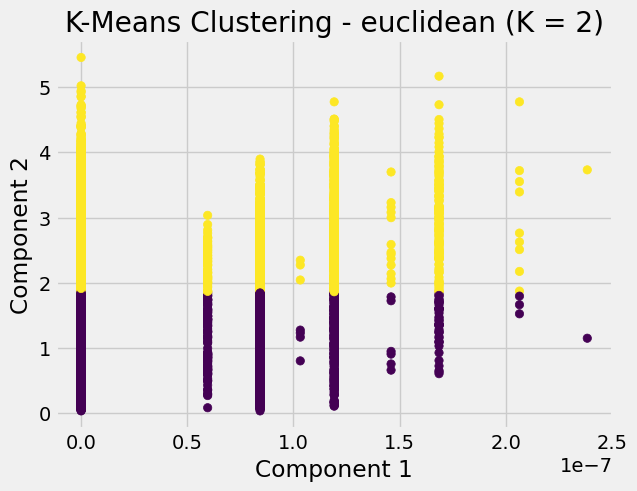

In [247]:
# Plot all the K-Means clusters
plt.scatter(best_distances[:, 0], best_distances[:, 1], c=cluster_labels)
plt.title(f"K-Means Clustering - {best_metric} (K = {best_k})")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [226]:
df['cluster_labels'] = cluster_labels

In [249]:
# Print the similarity matrix for each distance metric
for metric, similarity_matrix in similarity_matrices.items():
    print(f"Similarity matrix using {metric} distance:")
    print(similarity_matrix)
    print("\n")

Similarity matrix using euclidean distance:
[[0.00000000e+00 3.38790506e+00]
 [0.00000000e+00 1.66680167e+00]
 [1.19209290e-07 3.32543334e+00]
 ...
 [0.00000000e+00 2.17489511e+00]
 [1.68587394e-07 3.71186438e+00]
 [1.19209290e-07 2.50083314e+00]]


Similarity matrix using euclidean distance:
[[ 0.          7.68009867  7.94532523 ...  8.68761449  8.72226886
   8.83554203]
 [ 0.          3.5971375   3.80572913 ...  4.95815619  5.00789144
   5.06897728]
 [ 0.          7.78135101  9.57289433 ... 10.95024337 11.43067241
  11.59724288]
 ...
 [ 0.          5.88155314  8.56084826 ... 10.22345907 10.87062598
  10.93569653]
 [ 0.          5.91087844  7.42951197 ...  8.53554345  8.86719227
   8.91370196]
 [ 0.          5.27043016  5.58078261 ...  7.25792047  7.56220787
   7.98824114]]


Similarity matrix using euclidean distance:
[[ 1.         -0.04807641 -0.13584045 ... -0.31044399  0.43951325
  -0.32924026]
 [-0.04807641  1.          0.02311698 ... -0.1670714  -0.12745873
  -0.49821703]
 [-0.1

In [237]:
df['cluster_labels'].unique()

array([1, 0])

In [253]:
df.columns

Index(['Customer ID', 'Count', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'clusters', 'Cluster', 'cluster_labels'],
      dtype='object')

In [260]:
results = df[['Customer ID','cluster_labels']]
results

,Customer ID,cluster_labels
0,6207,1
1,5305,0
2,1129,1
3,3208,1
4,3419,0
...,...,...
7038,1758,0
7039,4853,1
7040,1525,1
7041,3367,1


In [262]:
import pandas as pd

# Load the transaction data into a DataFrame
data = {
    'Client ID': [1001, 1002, 1003, 1004],
    'Transaction Amount': [[50.35, 300.0], [100.2], [75.1], [500.75]],
    'Merchant Category': [['Restaurant', 'Electronics Store'], ['Clothing Store'], ['Grocery Store'], ['Travel Agency']],
    'Location': [['New York', 'Chicago'], ['Los Angeles'], ['Miami'], ['San Francisco']],
    'Transaction Date': [['2023-07-12', '2023-07-11'], ['2023-07-10'], ['2023-07-09'], ['2023-07-08']]
}
df = pd.DataFrame(data)

df


,Client ID,Transaction Amount,Merchant Category,Location,Transaction Date
0,1001,"[50.35, 300.0]","[Restaurant, Electronics Store]","[New York, Chicago]","[2023-07-12, 2023-07-11]"
1,1002,[100.2],[Clothing Store],[Los Angeles],[2023-07-10]
2,1003,[75.1],[Grocery Store],[Miami],[2023-07-09]
3,1004,[500.75],[Travel Agency],[San Francisco],[2023-07-08]


In [263]:
df.columns

Index(['Client ID', 'Transaction Amount', 'Merchant Category', 'Location',
       'Transaction Date'],
      dtype='object')

In [268]:
df['Transaction Date'] = df['Transaction Date'].apply(lambda dates: [pd.to_datetime(date) for date in dates])
as

0    [2023-07-12 00:00:00, 2023-07-11 00:00:00]
1                         [2023-07-10 00:00:00]
2                         [2023-07-09 00:00:00]
3                         [2023-07-08 00:00:00]
Name: Transaction Date, dtype: object

In [273]:
df['Transaction Date'] = df['Transaction Date'].apply(lambda dates: [pd.to_datetime(date) for date in dates])
df['Transaction Date']

0    [2023-07-12 00:00:00, 2023-07-11 00:00:00]
1                         [2023-07-10 00:00:00]
2                         [2023-07-09 00:00:00]
3                         [2023-07-08 00:00:00]
Name: Transaction Date, dtype: object

In [277]:
# Convert the 'Transaction Date' column to datetime
df['Transaction Date'] = df['Transaction Date'].apply(lambda dates: [pd.to_datetime(date) for date in dates])

# Extract date features
df['DayOfWeek'] = df['Transaction Date'].apply(lambda dates: [date.day_name() for date in dates])
df['Month'] = df['Transaction Date'].apply(lambda dates: [date.month for date in dates])
df['Year'] = df['Transaction Date'].apply(lambda dates: [date.year for date in dates])

# Print the updated DataFrame
df

,Client ID,Transaction Amount,Merchant Category,Location,Transaction Date,DayOfWeek,Month,Year
0,1001,"[50.35, 300.0]","[Restaurant, Electronics Store]","[New York, Chicago]","[2023-07-12 00:00:00, 2023-07-11 00:00:00]","[Wednesday, Tuesday]","[7, 7]","[2023, 2023]"
1,1002,[100.2],[Clothing Store],[Los Angeles],[2023-07-10 00:00:00],[Monday],[7],[2023]
2,1003,[75.1],[Grocery Store],[Miami],[2023-07-09 00:00:00],[Sunday],[7],[2023]
3,1004,[500.75],[Travel Agency],[San Francisco],[2023-07-08 00:00:00],[Saturday],[7],[2023]


In [284]:
# Extract the first date from the list in 'Transaction Date' column for grouping
df['Grouping Date'] = df['Transaction Date'].apply(lambda dates: dates[0])

# Calculate daily total transaction amount
daily_total = df.groupby('Grouping Date')['Transaction Amount'].sum()
daily_total

Grouping Date
2023-07-08          [500.75]
2023-07-09            [75.1]
2023-07-10           [100.2]
2023-07-12    [50.35, 300.0]
Name: Transaction Amount, dtype: object

In [285]:
df

,Client ID,Transaction Amount,Merchant Category,Location,Transaction Date,DayOfWeek,Month,Year,Grouping Date
0,1001,"[50.35, 300.0]","[Restaurant, Electronics Store]","[New York, Chicago]","[2023-07-12 00:00:00, 2023-07-11 00:00:00]","[Wednesday, Tuesday]","[7, 7]","[2023, 2023]",2023-07-12
1,1002,[100.2],[Clothing Store],[Los Angeles],[2023-07-10 00:00:00],[Monday],[7],[2023],2023-07-10
2,1003,[75.1],[Grocery Store],[Miami],[2023-07-09 00:00:00],[Sunday],[7],[2023],2023-07-09
3,1004,[500.75],[Travel Agency],[San Francisco],[2023-07-08 00:00:00],[Saturday],[7],[2023],2023-07-08
